<ol start=31><li>Standardize or normalize the predictors.
<li>Construct the correlation matrix for the predictors. Between which predictors do you find the highest correlations?
<li>Build a regression model to estimate quality based on the predictors. Obtain the VIFs from the model. Which VIFs indicate that multicollinearity is a problem? Compare the variables with high VIF to the correlated variables from the previous exercise.
<li>Perform PCA using varimax rotation. Show the rotated proportions of variance explained for extracting up to five components. What percent of the variability is explained by one component? By two components? By three components? By four components? By all five components?
<li>Say we want to explain at least 90% of the variability. How many components does the proportion of variance explained criterion suggest we extract?
<li>Make a plot of the eigenvalues of the five components. According to the eigenvalue criterion, how many components should we extract?
<li>Combine the recommendations from the two criteria to reach a consensus as to how many components we should extract.
<li>Profile each of your components, stating which variables are included, and noting their within‐component correlation (positive or negative). For simplicity, consider components weights greater than 0.5 only.
<li>Produce the correlation matrix for the components. What do these values mean?
<li>Next, use only the components you extracted to estimate wine quality using a regression model. Do not include the original predictors.
<ol><li>Compare the values of s and images between the PCA regression and the original regression model.
<li>Explain why the original model slightly outperformed the PCA model.
    <li>Explain how the PCA model may be considered superior, even though slightly outperformed?</ol>
<li>In your regression from the previous exercise, what are the VIFs of the two components in the regression model? What do these values mean?</ol>

In [64]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wine_train = pd.read_csv(r"C:\Users\jevers\Documents\Jupyter Files\CPSC 5175\Datasets\Website Data Sets\red_wine_PCA_training")
wine_test = pd.read_csv(r"C:\Users\jevers\Documents\Jupyter Files\CPSC 5175\Datasets\Website Data Sets\red_wine_PCA_test")

In [65]:
wine_train.head()

,type,alcohol,density,fixed acidity,pH,quality,residual sugar
0,red,8.5,0.99914,10.0,3.15,5,1.6
1,red,9.0,1.00040,13.3,3.06,5,1.9
2,red,9.0,0.99560,7.3,3.37,4,1.6
3,red,9.0,0.99717,8.0,3.39,5,1.9
4,red,9.0,0.99780,7.0,3.48,5,1.8


<b>31. Standardize or normalize the predictors.</b>

In [66]:
# Putting the data into a Pandas dataframe
X = pd.DataFrame(wine_train[['alcohol', 'residual sugar', 'pH', 'density', 'fixed acidity']])

# Q31. Normalizing the predictor variables using the Scipy package
Xz = pd.DataFrame(stats.zscore(X), columns = ['alcohol', 'residual sugar', 'pH', 'density', 'fixed acidity'])

In [67]:
Xz.corr()

,alcohol,residual sugar,pH,density,fixed acidity
alcohol,1.000000,0.023698,0.167717,-0.519857,-0.038576
residual sugar,0.023698,1.000000,-0.074161,0.317020,0.077262
pH,0.167717,-0.074161,1.000000,-0.307740,-0.663826
density,-0.519857,0.317020,-0.307740,1.000000,0.646620
fixed acidity,-0.038576,0.077262,-0.663826,0.646620,1.000000


<b>32. Construct the correlation matrix for the predictors. Between which predictors do you find the highest correlations?</b>
<ul><li>We can see strong positive correlation between fixed acidity and density, and moderate negative correlation between pH and fixed acidity</ul>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017ED7B038E0>,
      dtype=object)

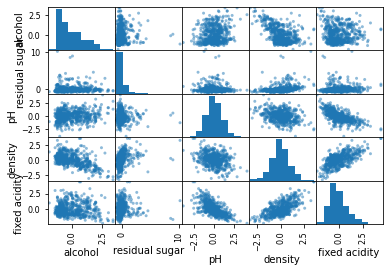

In [68]:
# Q32
pd.plotting.scatter_matrix(Xz)

# Does this satisfy Q33? Ask Mailman, do values need to be standardized? Training and Test data sets regression models don't match. What now?


33.Build a regression model to estimate quality based on the predictors. Obtain the VIFs from the model. Which VIFs indicate that multicollinearity is a problem? Compare the variables with high VIF to the correlated variables from the previous exercise.

In [69]:
# Build data frame containing target variable. We already have df X containing predictor variables from a previous step
Y = pd.DataFrame(wine_train[['quality']])
# Standardize the target
Yz = pd.DataFrame(stats.zscore(Y), columns = [['quality']])
# Add a constant to the predictor variables
Xz = sm.add_constant(Xz)
# Run the regression model
model01 = sm.OLS(Yz, Xz).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     53.32
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           5.59e-46
Time:                        16:37:57   Log-Likelihood:                -769.35
No. Observations:                 621   AIC:                             1551.
Df Residuals:                     615   BIC:                             1577.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.274e-15      0.034  -1.27e-13      1.000      -0.066       0.066
alcohol            0.4709      0.056      8.469      0.000       0.362       0.580
residual sugar    -0.0214      0.041     -0.524      0.601      -0.102       0.059
pH                -0.0885      0.054     -1.629      0.104      -0.195       0.018
density           -0.1173      0.079     -1.492      0.136      -0.272       0.037
fixed acidity      0.1855      0.081      2.301      0.022       0.027       0.344
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                7.011
Skew:                          -0.062   Prob(JB):                       0.0300
Kurtosis:                       3.506   Cond. No.                         5.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Validating the regression model by running it on the test data set. Does not match
X_test = pd.DataFrame(wine_test[['alcohol', 'residual sugar', 'pH', 'density', 'fixed acidity']])
Xz_test = pd.DataFrame(stats.zscore(X_test), columns = ['alcohol', 'residual sugar', 'pH', 'density', 'fixed acidity'])
Y_test = pd.DataFrame(wine_test[['quality']])
Yz_test = pd.DataFrame(stats.zscore(Y_test), columns = [['quality']])
Xz_test = sm.add_constant(Xz_test)
model01_test = sm.OLS(Yz_test, Xz_test).fit()
model01_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     41.21
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           2.67e-36
Time:                        16:37:57   Log-Likelihood:                -741.02
No. Observations:                 585   AIC:                             1494.
Df Residuals:                     579   BIC:                             1520.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.456e-15      0.036  -9.68e-14      1.000      -0.070       0.070
alcohol            0.5566      0.061      9.156      0.000       0.437       0.676
residual sugar    -0.0024      0.044     -0.053      0.957      -0.089       0.084
pH                -0.1315      0.061     -2.165      0.031      -0.251      -0.012
density            0.0760      0.083      0.910      0.363      -0.088       0.240
fixed acidity      0.0079      0.088      0.091      0.928      -0.164       0.180
==============================================================================
Omnibus:                       25.074   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.210
Skew:                          -0.286   Prob(JB):                     1.52e-10
Kurtosis:                       4.236   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Calculate the variance inflation factors
[inf.variance_inflation_factor(Xz.values, i) for i in range(Xz.shape[1])]

[1.0,
 2.725132697275974,
 1.472854870800106,
 2.6049882952512564,
 5.446835149159627,
 5.72926780782868]

Q34. Perform PCA using varimax rotation. Show the rotated proportions of variance explained for extracting up to five components. 
<ol><li>What percent of the variability is explained by one component? 
    <ul><li> 45.6%</ul>
        <ol>By two components? 
    <ul><li> 67.6%</ul>
    <ol>By three components? 
    <ul><li> 88.0%</ul>
    <ol>By four components? 
    <ul><li> 98.5%</ul>
    <ol>By all five components?
        <ul><li> 100%</ul></ol>

In [3]:
import sklearn
print('The sklearn version is {}.'.format(sklearn.__version__))

The sklearn version is 0.23.1.


In [4]:
pca01 = PCA(n_components=5)
pca01


NameError: name 'PCA' is not defined

In [73]:
principComp = pca01.fit_transform(Xz)
principComp

array([[ 2.24038515, -0.6894783 , -1.46382124,  0.09562988, -0.03713986],
       [ 3.94123558,  0.46698742, -1.18952399, -0.64721064, -0.51897882],
       [-0.6415395 , -1.06106217, -1.12279373,  0.45901644, -0.50151167],
       ...,
       [-2.66355217,  2.3833288 ,  0.65208282, -0.36352791,  0.25984296],
       [-4.59467707,  2.25831714,  0.87179219,  0.03973511,  0.02395642],
       [-5.16725148,  1.29898686,  1.30503783, -1.04398859, -0.01576754]])

In [74]:
pca01.explained_variance_ratio_

array([0.45592189, 0.21989834, 0.20432508, 0.10531236, 0.01454233])

In [75]:
np.cumsum(pca01.explained_variance_ratio_)

array([0.45592189, 0.67582023, 0.88014531, 0.98545767, 1.        ])

<b>35. Say we want to explain at least 90% of the variability. How many components does the proportion of variance explained criterion suggest we extract?</b><ul><li>Four components are required to explain AT LEAST 90% of the variability. Three components would explain 88%, and four components will explain 98.5%</ul></ol>

<b>36. Make a plot of the eigenvalues of the five components. According to the eigenvalue criterion, how many components should we extract?</b>